In [1]:
from EllipticalSliceSampler import EllipticalSampler
from gpc import GPC
from utils import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pickle 
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

DATAPATH = "data"
heart = pd.read_csv(os.path.join(DATAPATH,"heart.csv"))
heart
heart_int = heart[heart.describe().columns].drop(['FastingBS'],axis=1)
heart_int = heart_int[heart_int['Cholesterol']!=0][["Cholesterol","MaxHR","HeartDisease"]]
y = heart_int['HeartDisease'][0:400]

X = heart_int[["Cholesterol","MaxHR"]][0:400].values

x, x_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
file = open(b"data/clean/model2.111trained.pkl","rb")
gpc2 = pickle.load(file)

file2 = open(b"data/clean/posterior_predict_samples.pkl","rb")
posterior_predict_samples = pickle.load(file2)

file3 = open(b"data/clean/posterior_samples.pkl","rb")
posterior_samples = pickle.load(file3)

file4 = open(b"data/clean/posterior_samples_fitted.pkl","rb")
posterior_samples_fitted = pickle.load(file4)

file5 = open(b"data/clean/prior_samples.pkl","rb")
prior_samples = pickle.load(file5)

file6 = open(b"data/clean/clean_x_test.pkl","rb")
x_test = pickle.load(file6)

file7 = open(b"data/clean/clean_x_train.pkl","rb")
x = pickle.load(file7)

file8 = open(b"data/clean/clean_y_test.pkl","rb")
y_test = pickle.load(file8)

file9 = open(b"data/clean/clean_y_train.pkl","rb")
y = pickle.load(file9)

[]

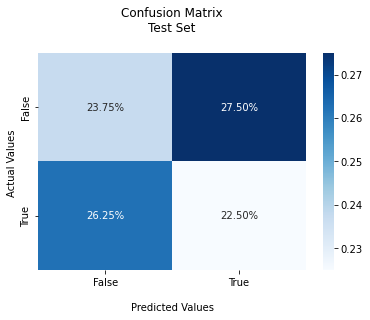

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = gpc2.predict(x_test)
pred = np.round(sigmoid(predictions[0]))

cf_matrix = confusion_matrix(y_true=np.array(y_test),y_pred=pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%',annot=True,cmap='Blues')

ax.set_title('Confusion Matrix\nTest Set\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

ax.plot()

[]

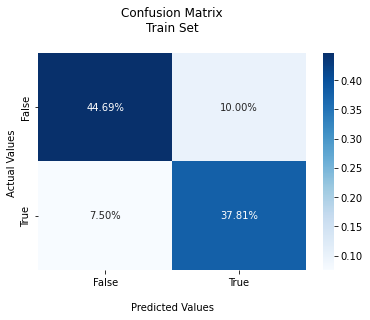

In [22]:
pred = np.round(sigmoid(posterior_samples_fitted.mean(axis=0)))

cf_matrix = confusion_matrix(y_true=np.array(y),y_pred=pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%',annot=True,cmap='Blues')

ax.set_title('Confusion Matrix\nTrain Set\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

ax.plot()
